# **Exploratory Data Analysis Lab**


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


## Hands on Lab


Import the pandas module.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [4]:
df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


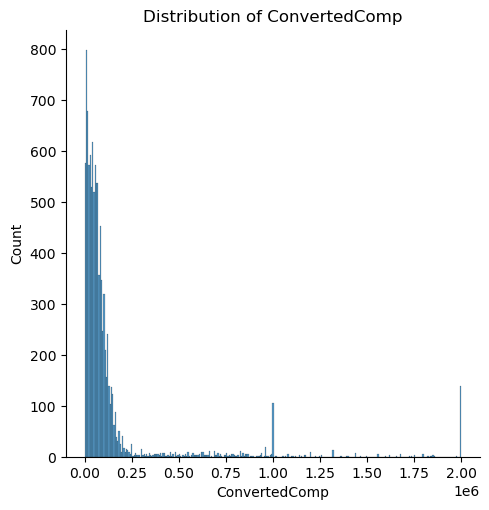

In [9]:
# your code goes here
sns.displot(df['ConvertedComp'].dropna())
plt.title('Distribution of ConvertedComp')
plt.show()

Plot the histogram for the column `ConvertedComp`.


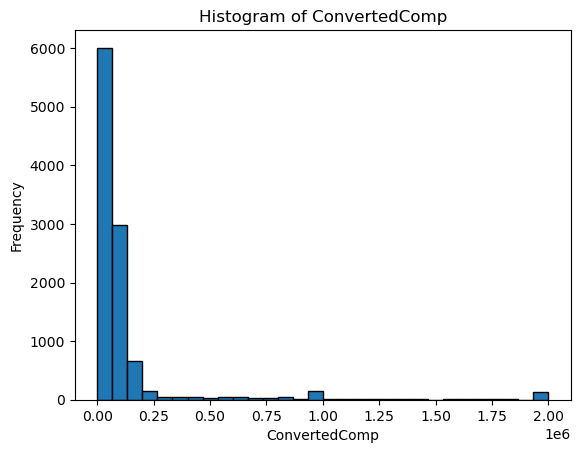

In [28]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', bins =30, edgecolor = 'black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [17]:
# your code goes here
man_count = df[df['Gender']=='Man'].shape[0]
print(f"Number of respondents who identified as 'Man': {man_count}")

Number of respondents who identified as 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [19]:
# your code goes here
median_woman_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"Median ConvertedComp for respondents identified as 'Woman': {median_woman_comp}")

Median ConvertedComp for respondents identified as 'Woman': 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [23]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


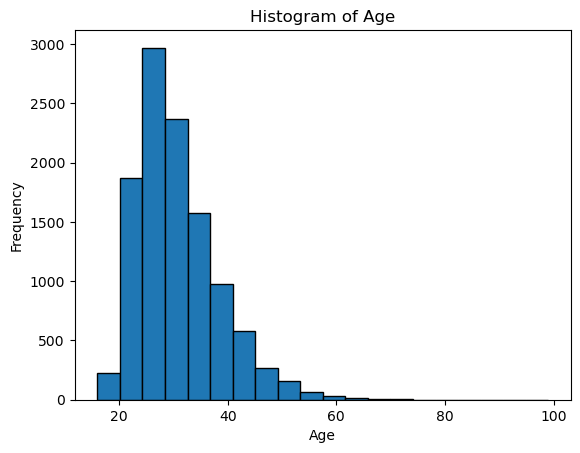

In [31]:
# your code goes here
df['Age'].plot(kind='hist', bins =20, edgecolor = 'black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


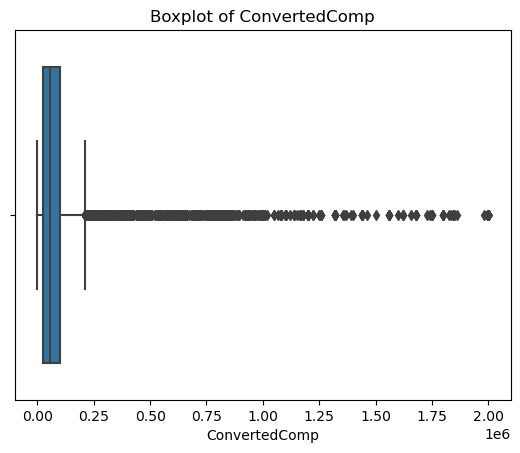

In [34]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'].dropna())
plt.title('Boxplot of ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [35]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range for ConvertedComp: {IQR}")

Interquartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [36]:
# your code goes here
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 - 1.5*IQR
print(f"Lower bound :{lower_bound}, Upper bound: {upper_bound}")

Lower bound :-82830.0, Upper bound: -9698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [37]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
print(f"Number of outliers in 'ConvertedComp': {outliers.shape[0]}")

Number of outliers in 'ConvertedComp': 10582


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [38]:
# your code goes here
# Remove the outliers from 'ConvertedComp'
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f"New dataset shape after removing outliers: {df_no_outliers.shape}")

New dataset shape after removing outliers: (0, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [44]:
# your code goes here
age_corr = df.corr()['Age']
print(f"Correlation of Age with other numerical columns \n{age_corr}")

Correlation of Age with other numerical columns 
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


C:\Users\nguye\AppData\Local\Temp\ipykernel_13704\1543097356.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  age_corr = df.corr()['Age']
